In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling 
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

<Figure size 720x540 with 0 Axes>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [5]:
HRdata = pd.read_csv('/Users/Yatin/Analytics lab course/case studies and exercises/Jan11and12 case study/Class16-17 Files/Logisic Regression/2. HR Analytics - Predicting employee Attrition/HR_comma_sep.csv')

In [6]:
HRdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
HRdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
Work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
department               11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [8]:
pandas_profiling.ProfileReport(HRdata)

Number of variables,10
Number of observations,11991
Total Missing (%),0.0%
Total size in memory,936.9 KiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [9]:
numeric_var_names=[key for key in dict(HRdata.dtypes) if dict(HRdata.dtypes)[key] in ['float64', 'int64']]
cat_var_names=[key for key in dict(HRdata.dtypes) if dict(HRdata.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['department', 'salary']


In [10]:
HRdata_num=HRdata[numeric_var_names]
HRdata_num.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [11]:
HRdata_cat = HRdata[cat_var_names]

In [12]:
HRdata_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 2 columns):
department    11991 non-null object
salary        11991 non-null object
dtypes: object(2)
memory usage: 187.4+ KB


In [13]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

HRdata_num=HRdata_num.apply(lambda x: outlier_capping(x))

In [14]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df = pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

for i in HRdata_cat.columns:
    HRdata_cat[i] = HRdata_cat[i].astype('category')
    HRdata_cat= create_dummies(HRdata_cat,i)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
HRdata_cat.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [16]:
HRdata_new = pd.concat([HRdata_num, HRdata_cat], axis=1)

HRdata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 19 columns):
satisfaction_level        11991 non-null float64
last_evaluation           11991 non-null float64
number_project            11991 non-null int64
average_montly_hours      11991 non-null int64
time_spend_company        11991 non-null int64
Work_accident             11991 non-null int64
left                      11991 non-null int64
promotion_last_5years     11991 non-null int64
department_RandD          11991 non-null uint8
department_accounting     11991 non-null uint8
department_hr             11991 non-null uint8
department_management     11991 non-null uint8
department_marketing      11991 non-null uint8
department_product_mng    11991 non-null uint8
department_sales          11991 non-null uint8
department_support        11991 non-null uint8
department_technical      11991 non-null uint8
salary_low                11991 non-null uint8
salary_medium             11991 non-null 

In [17]:
HRdata_new.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
satisfaction_level,1.000000,0.095458,-0.132655,-0.002791,-0.163907,0.039836,-0.350030,0.019758,-0.002579,-0.021062,-0.007319,0.001861,0.005184,0.000177,0.004268,0.009062,-0.003439,-0.027833,0.018573
last_evaluation,0.095458,1.000000,0.270649,0.264500,0.102009,-0.005630,0.013123,-0.007152,-0.005480,0.007372,-0.001369,0.011023,0.002535,-0.003983,-0.022749,0.015976,0.008803,0.010401,-0.000795
number_project,-0.132655,0.270649,1.000000,0.330007,0.202080,-0.005612,0.030928,-0.000544,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.000914,0.002484
average_montly_hours,-0.002791,0.264500,0.330007,1.000000,0.109508,-0.012316,0.066787,-0.004803,0.004333,0.001669,-0.005347,0.004295,-0.004974,-0.008127,-0.002635,0.001511,0.006057,-0.001021,0.002242
time_spend_company,-0.163907,0.102009,0.202080,0.109508,1.000000,-0.003129,0.190451,0.053979,-0.005369,0.007666,-0.016652,0.076392,0.011130,-0.004029,0.007655,-0.023179,-0.017877,-0.028376,0.017633
Work_accident,0.039836,-0.005630,-0.005612,-0.012316,-0.003129,1.000000,-0.125436,0.029852,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.001580,-0.003108
left,-0.350030,0.013123,0.030928,0.066787,0.190451,-0.125436,1.000000,-0.044657,-0.029016,0.005955,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,0.099113,-0.047214
promotion_last_5years,0.019758,-0.007152,-0.000544,-0.004803,0.053979,0.029852,-0.044657,1.000000,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,-0.076576,0.041601
department_RandD,-0.002579,-0.005480,0.010077,0.004333,-0.005369,0.011793,-0.029016,0.025610,1.000000,-0.057925,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.007301,0.014761
department_accounting,-0.021062,0.007372,0.006286,0.001669,0.007666,-0.009178,0.005955,-0.001497,-0.057925,1.000000,-0.053684,-0.045397,-0.056989,-0.057569,-0.142173,-0.098892,-0.112135,-0.000955,-0.007934


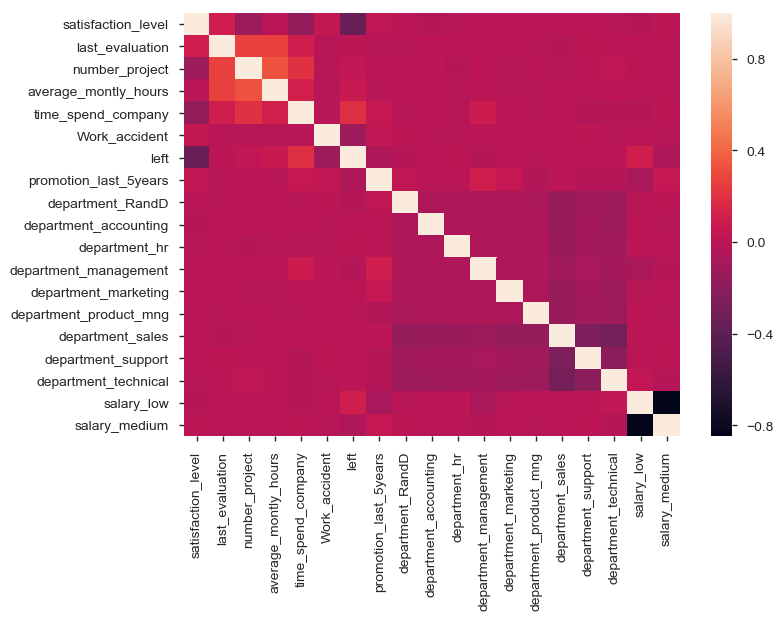

In [18]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(HRdata_new.corr())

In [19]:
HRdata_new.columns.difference(['left'])

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


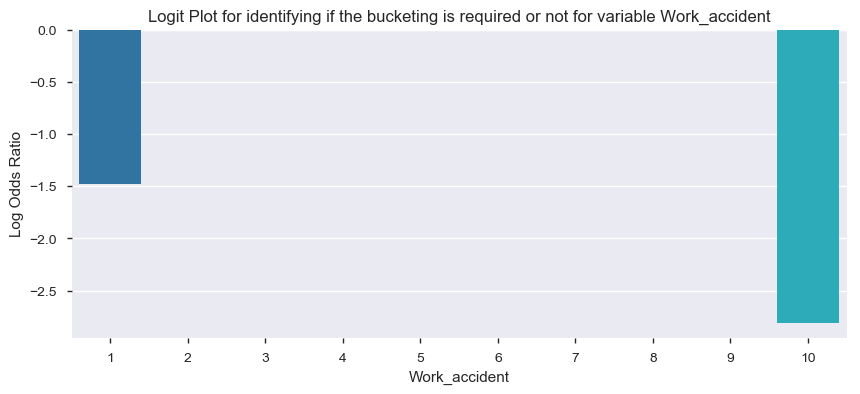

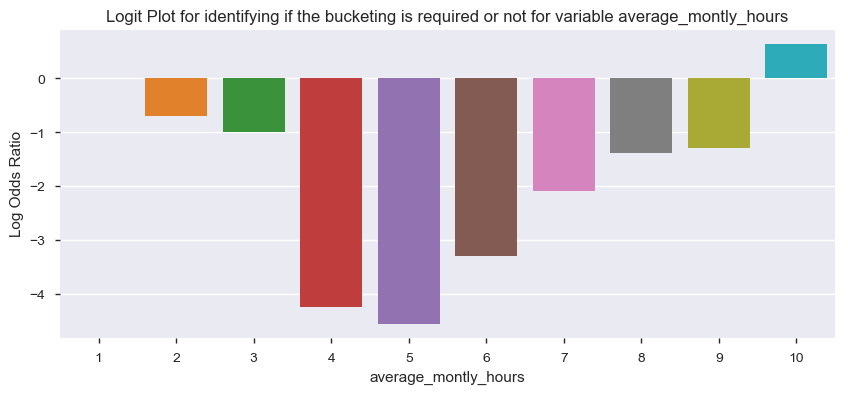

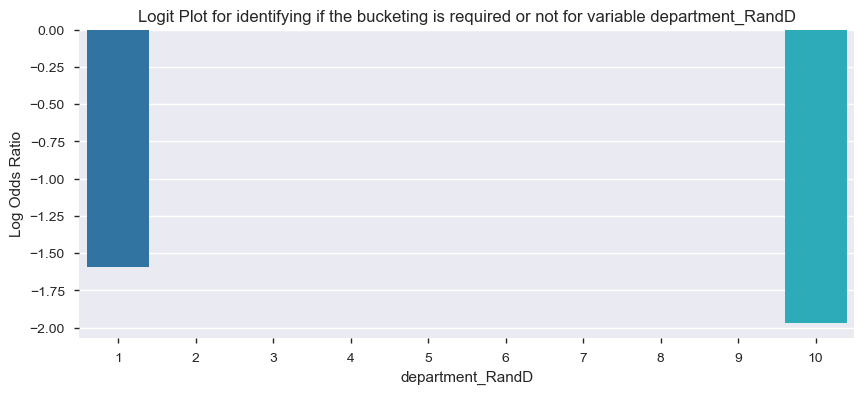

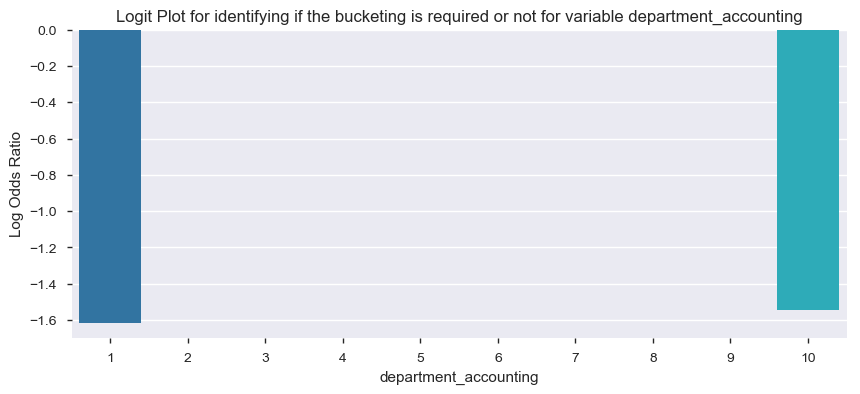

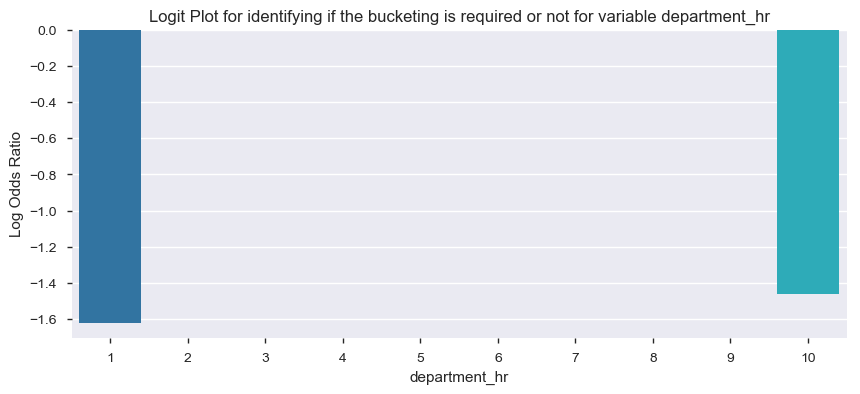

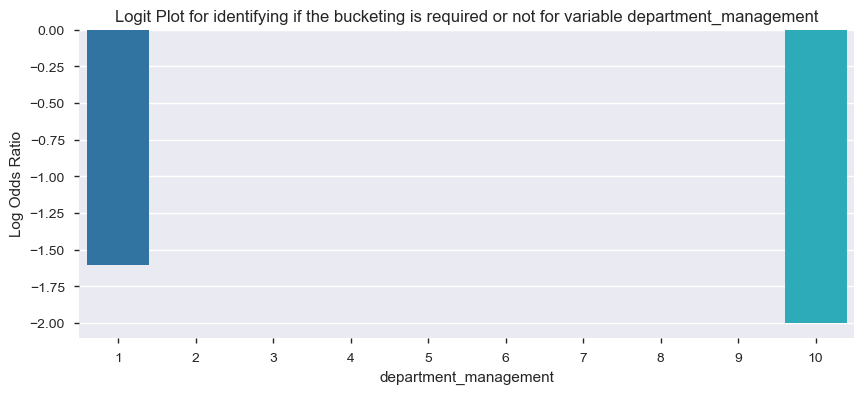

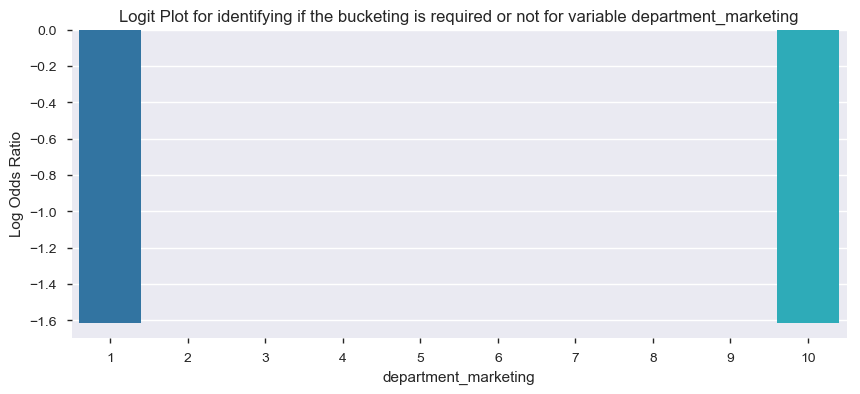

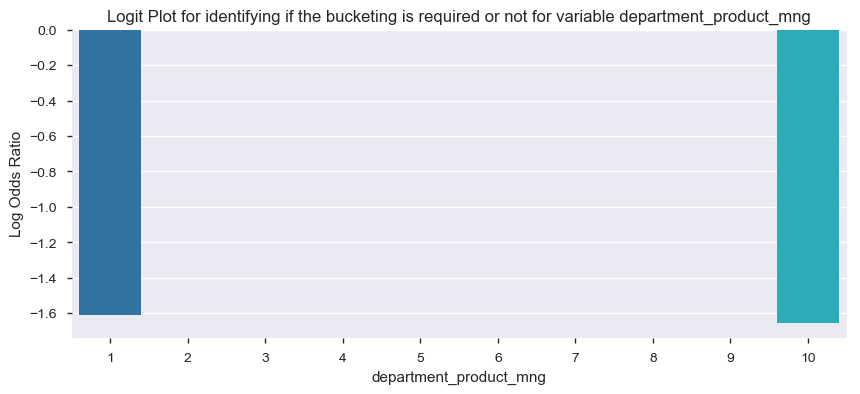

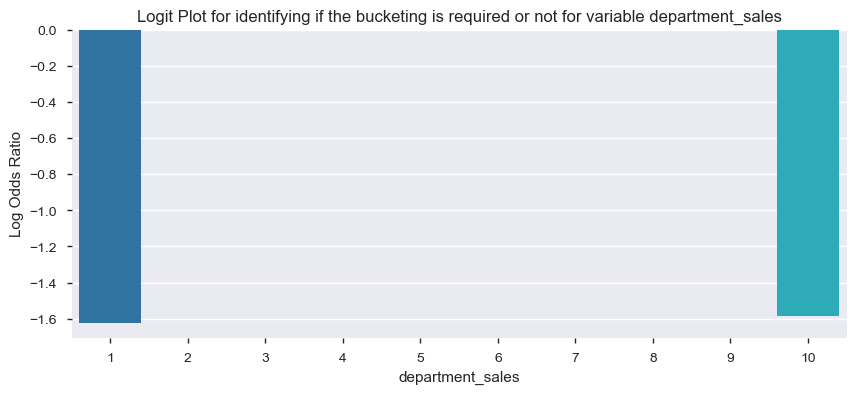

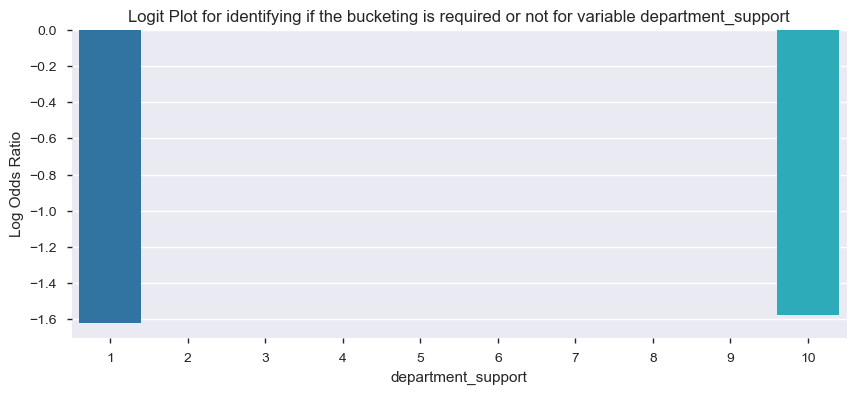

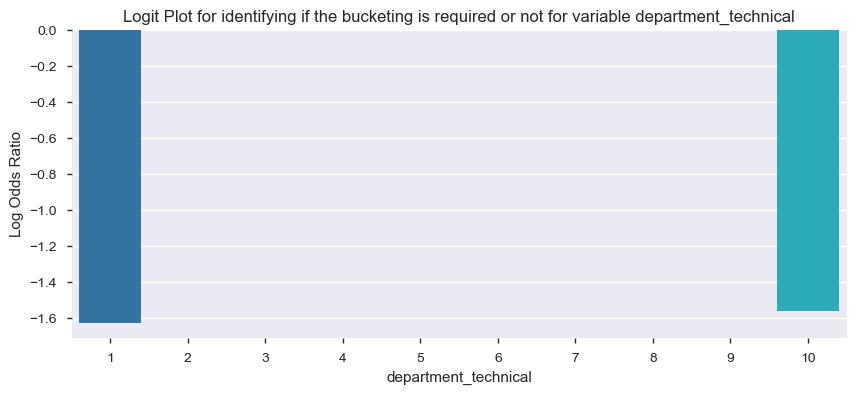

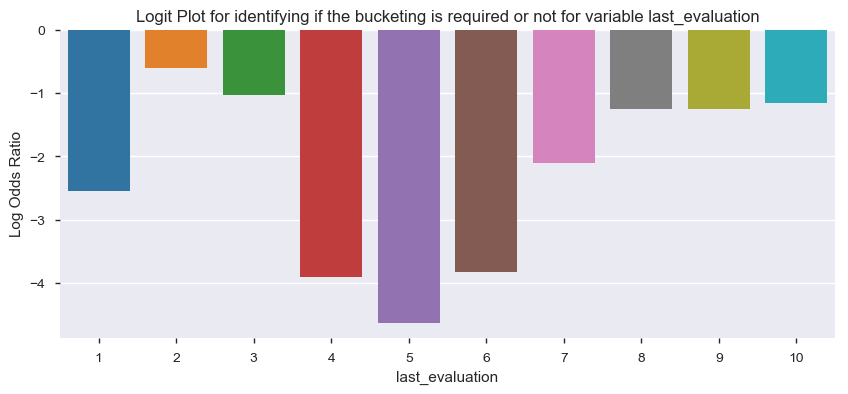

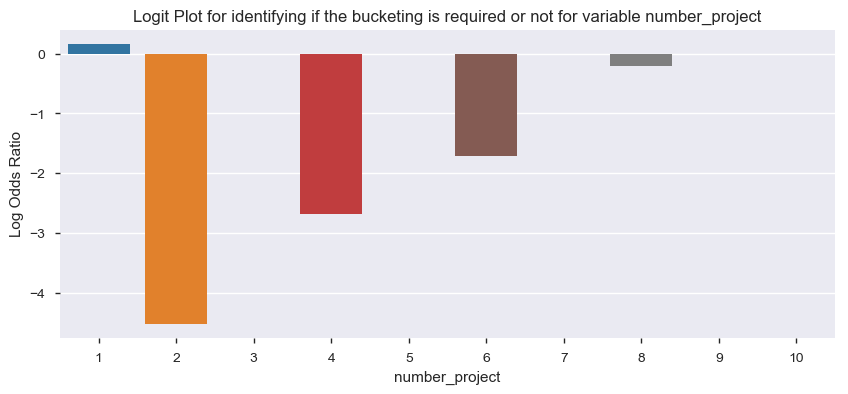

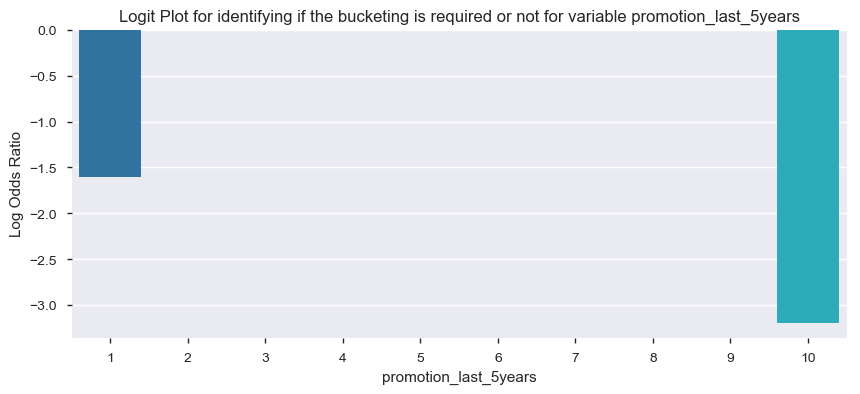

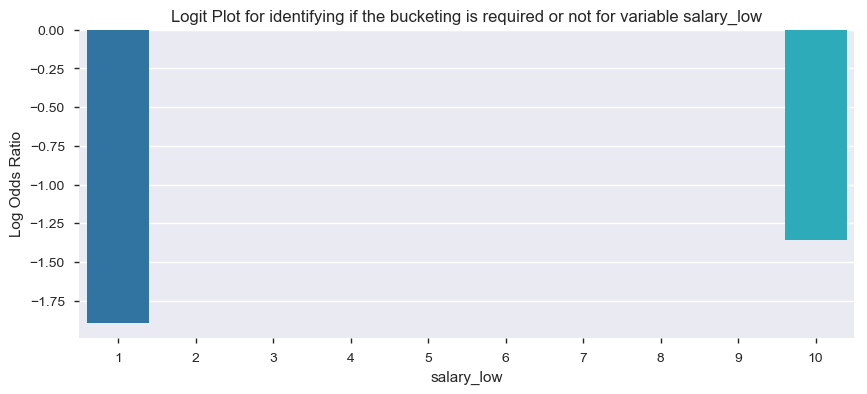

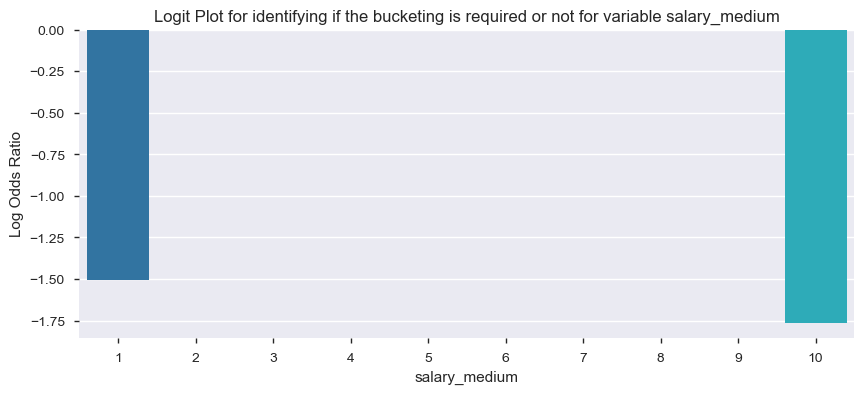

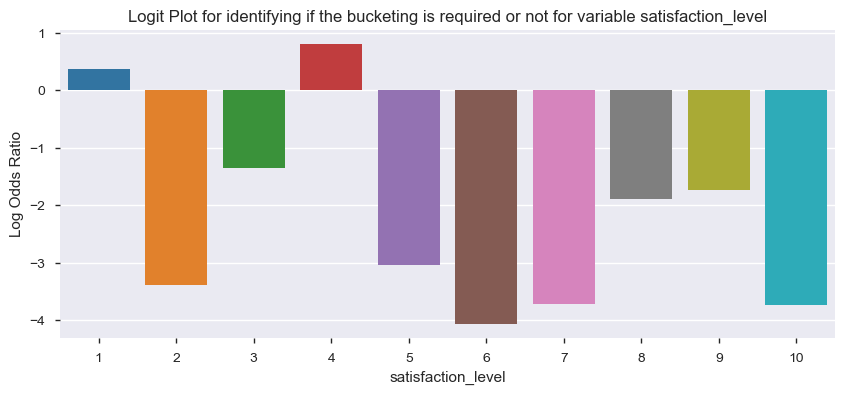

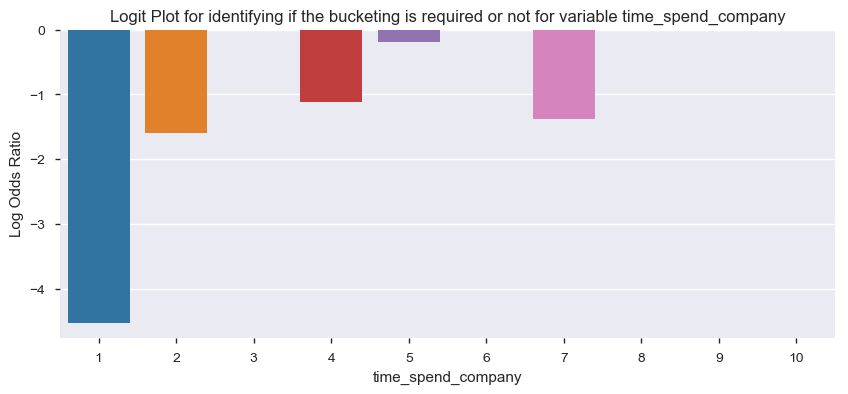

In [20]:
bp = PdfPages('HRdata Transformation Plots.pdf')

for num_variable in HRdata_new.columns.difference(['left']):
    binned = pd.cut(HRdata_new[num_variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    odds = HRdata_new.groupby(binned)['left'].sum() / (HRdata_new.groupby(binned)['left'].count()-HRdata_new.groupby(binned)['left'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [21]:
somersd_df = pd.DataFrame()
for num_variable in HRdata_new.columns.difference(['left']):
    logreg = sm.logit(formula = str('left ~ ')+str(num_variable), data=HRdata_new)
    result = logreg.fit()
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(HRdata_new['left'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.439856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.447319
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449100
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449536
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449464
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449553
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.449534
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449535
  

,Variable Name,SomersD
0,Work_accident,0.121763
0,average_montly_hours,0.0738999
0,department_RandD,0.0182079
0,department_accounting,0.00354636
0,department_hr,0.0079554
0,department_management,0.0122825
0,department_marketing,0.000153139
0,department_product_mng,0.00235138
0,department_sales,0.00734309
0,department_support,0.00580517


In [22]:
somersd_df.sort_values(by='SomersD', ascending=False)

,Variable Name,SomersD
0,satisfaction_level,0.494017
0,time_spend_company,0.381564
0,salary_low,0.133053
0,Work_accident,0.121763
0,average_montly_hours,0.0738999
0,salary_medium,0.0629619
0,department_RandD,0.0182079
0,promotion_last_5years,0.0154819
0,department_management,0.0122825
0,department_technical,0.0104815


In [23]:
## Variance Inflation Factor assessment
X = pd.concat([HRdata_new[HRdata_new.columns.difference(['left'])],HRdata_new['left']], axis=1)
features = "+".join(HRdata_new.columns.difference(['left']))
X.head()

,Work_accident,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation,number_project,promotion_last_5years,salary_low,salary_medium,satisfaction_level,time_spend_company,left
0,0,157,0,0,0,0,0,0,1,0,0,0.53,2,0,1,0,0.38,3,1
1,0,262,0,0,0,0,0,0,1,0,0,0.86,5,0,0,1,0.80,6,1
2,0,272,0,0,0,0,0,0,1,0,0,0.88,7,0,0,1,0.11,4,1
3,0,223,0,0,0,0,0,0,1,0,0,0.87,5,0,1,0,0.72,5,1
4,0,159,0,0,0,0,0,0,1,0,0,0.52,2,0,1,0,0.37,3,1


In [24]:
features

'Work_accident+average_montly_hours+department_RandD+department_accounting+department_hr+department_management+department_marketing+department_product_mng+department_sales+department_support+department_technical+last_evaluation+number_project+promotion_last_5years+salary_low+salary_medium+satisfaction_level+time_spend_company'

In [25]:
a,b = dmatrices(formula_like='left ~ '+ 'Work_accident+average_montly_hours+department_RandD+department_accounting+department_hr+department_management+department_marketing+department_product_mng+last_evaluation+number_project+promotion_last_5years+satisfaction_level+time_spend_company', data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                features
0    42.915175               Intercept
1     1.003038           Work_accident
2     1.168099    average_montly_hours
3     1.022465        department_RandD
4     1.020065   department_accounting
5     1.020075           department_hr
6     1.030592   department_management
7     1.023837    department_marketing
8     1.021456  department_product_mng
9     1.145513         last_evaluation
10    1.227784          number_project
11    1.018198   promotion_last_5years
12    1.065385      satisfaction_level
13    1.080879      time_spend_company


In [26]:
#Train and Test split
train, test = train_test_split(HRdata_new, test_size=0.3, random_state=42)
train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [27]:
logreg = sm.logit(formula='left ~ Work_accident+average_montly_hours+department_RandD+department_management+last_evaluation+number_project+promotion_last_5years+satisfaction_level+time_spend_company', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.366564
         Iterations 7


In [28]:
 print(result.summary2())

                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.183      
Dependent Variable:   left              AIC:               6173.1411  
Date:                 2019-04-01 12:19  BIC:               6243.4926  
No. Observations:     8393              Log-Likelihood:    -3076.6    
Df Model:             9                 LL-Null:           -3764.1    
Df Residuals:         8383              LLR p-value:       1.9408e-290
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.6725   0.1906  -3.5283 0.0004 -1.0461 -0.2989
Work_accident         -1.2787   0.1268 -10.0865 0.0000 -1.5272 -1.0303
average_montly_hours   0.0036   0.

In [29]:
train_gini = 2*metrics.roc_auc_score(train['left'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['left'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.6344578903088982
The Gini Index for the model built on the Test Data is :  0.6671284645221305


In [30]:
train_auc = metrics.roc_auc_score(train['left'], result.predict(train))
test_auc = metrics.roc_auc_score(test['left'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.8172289451544491
The AUC for the model built on the Test Data is :  0.8335642322610652


In [31]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['left']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
6948,0,0.020327
9231,0,0.268365
617,1,0.269138
9287,0,0.082178
6021,0,0.123619


In [32]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['left']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
396,1,0.649700
3098,0,0.116765
9322,0,0.060291
357,1,0.330250
1323,1,0.547973


In [33]:
np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [34]:
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 0.0 if x < 0.2 else 1.0)

In [35]:
train_predict.head()

,actual,prob,predicted
6948,0,0.020327,0.0
9231,0,0.268365,1.0
617,1,0.269138,1.0
9287,0,0.082178,0.0
6021,0,0.123619,0.0


In [36]:
train_predict['tp'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['fp'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['tn'] = train_predict.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
train_predict['fn'] = train_predict.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)

In [37]:
train_predict.head(20)

,actual,prob,predicted,tp,fp,tn,fn
6948,0,0.020327,0.0,0.0,0.0,1.0,0.0
9231,0,0.268365,1.0,0.0,1.0,0.0,0.0
617,1,0.269138,1.0,1.0,0.0,0.0,0.0
9287,0,0.082178,0.0,0.0,0.0,1.0,0.0
6021,0,0.123619,0.0,0.0,0.0,1.0,0.0
9840,0,0.048752,0.0,0.0,0.0,1.0,0.0
8201,0,0.140108,0.0,0.0,0.0,1.0,0.0
7912,0,0.046336,0.0,0.0,0.0,1.0,0.0
2652,0,0.062970,0.0,0.0,0.0,1.0,0.0
6209,0,0.202034,1.0,0.0,1.0,0.0,0.0


In [38]:
accuracy = (train_predict.tp.sum()+train_predict.tn.sum())/(train_predict.tp.sum()+train_predict.tn.sum()+train_predict.fp.sum()+train_predict.fn.sum())

In [39]:
accuracy

0.7825568926486358

In [40]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)



In [41]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.165376
0,0.020408,0.997118,0.067238,0.221018
0,0.040816,0.987032,0.213133,0.341118
0,0.061224,0.972622,0.352748,0.455260
0,0.081633,0.960375,0.463954,0.546050
0,0.102041,0.915706,0.552034,0.612177
0,0.122449,0.855908,0.624411,0.662695
0,0.142857,0.806916,0.686510,0.706422
0,0.163265,0.764409,0.737045,0.741570
0,0.183673,0.718300,0.773305,0.764208


In [42]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [43]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.165376,1.000000
0,0.020408,0.997118,0.067238,0.221018,1.064356
0,0.040816,0.987032,0.213133,0.341118,1.200165
0,0.061224,0.972622,0.352748,0.455260,1.325371
0,0.081633,0.960375,0.463954,0.546050,1.424329


In [44]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.163265,0.764409,0.737045,0.74157,1.501454


In [45]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.897959,0.0,1.0,0.834624,1.0
0,0.918367,0.0,1.0,0.834624,1.0
0,0.938776,0.0,1.0,0.834624,1.0
0,0.959184,0.0,1.0,0.834624,1.0
0,0.979592,0.0,1.0,0.834624,1.0
0,1.000000,0.0,1.0,0.834624,1.0


In [46]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.165376,1.0


In [47]:
#Choosen Best Cut-off is 0.23 based on highest (sensitivity+specicity)
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.23 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.23 else 0)

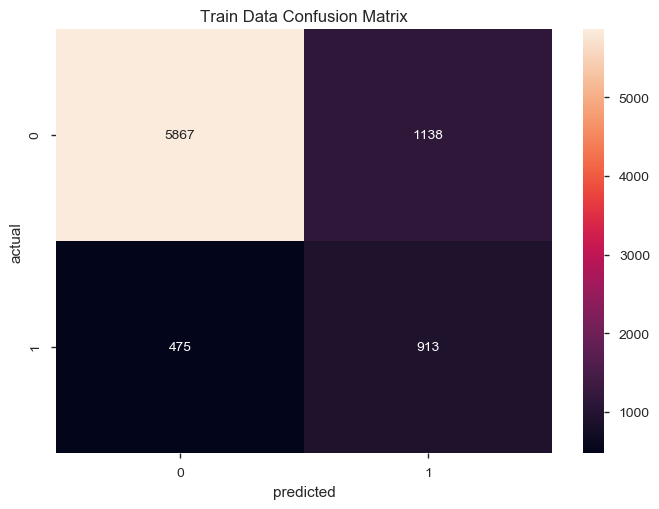

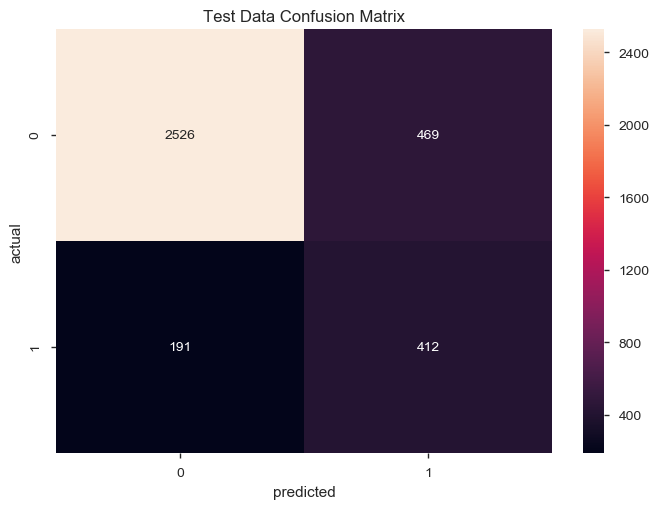

In [48]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [49]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.8078160371738353
The overall accuracy score for the Test Data  is :  0.8165647581989994


In [50]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7005
           1       0.45      0.66      0.53      1388

   micro avg       0.81      0.81      0.81      8393
   macro avg       0.69      0.75      0.71      8393
weighted avg       0.85      0.81      0.82      8393



In [51]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2995
           1       0.47      0.68      0.56       603

   micro avg       0.82      0.82      0.82      3598
   macro avg       0.70      0.76      0.72      3598
weighted avg       0.85      0.82      0.83      3598



# Decile Analysis

In [52]:
#Decile analysis
#Top-two deciles - High risk candidates - will probably resign
#3rd,4th, 5th deciesl - medium risk candidates - will stay if taken care
#6th decile onwards - low risk candidates 

In [53]:
#Decile analysis for validation of models - Business validation

In [54]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

In [55]:
train_predict.head()

,actual,prob,predicted,tp,fp,tn,fn,Deciles
6948,0,0.020327,0,0.0,0.0,1.0,0.0,0
9231,0,0.268365,1,0.0,1.0,0.0,0.0,8
617,1,0.269138,1,1.0,0.0,0.0,0.0,8
9287,0,0.082178,0,0.0,0.0,1.0,0.0,3
6021,0,0.123619,0,0.0,0.0,1.0,0.0,5


In [56]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

,actual,prob,predicted,Deciles
396,1,0.649700,1,9
3098,0,0.116765,0,5
9322,0,0.060291,0,2
357,1,0.330250,1,8
1323,1,0.547973,1,9


In [57]:
# Decile Analysis for train data
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [58]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [59]:
Decile_analysis_train

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.893179,0.398982,353,487,840
8,0.398852,0.267103,424,415,839
7,0.267094,0.187308,209,630,839
6,0.187304,0.141541,140,699,839
5,0.141474,0.109660,111,728,839
4,0.109651,0.083163,94,746,840
3,0.083156,0.061553,19,820,839
2,0.061537,0.044236,13,826,839
1,0.044204,0.027781,18,821,839


In [60]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.856723,0.392693,147,213,360
8,0.392326,0.264554,202,158,360
7,0.264508,0.188103,89,271,360
6,0.187992,0.142557,66,293,359
5,0.142538,0.105899,51,309,360
4,0.105652,0.082036,33,327,360
3,0.082028,0.061242,7,352,359
2,0.061209,0.044933,2,358,360
1,0.044911,0.029005,4,356,360


In [61]:
Decile_analysis_train.to_csv('Decile_analysis_train_HR data.csv')

In [62]:
Decile_analysis_test.to_csv('Decile_analysis_test_HR data.csv')

# Predicting new attritions(Implementation of model based on new data)

In [70]:
HRdata_brandnew =  pd.read_csv('/Users/Yatin/Analytics lab course/case studies and exercises/Jan11and12 case study/Class16-17 Files/Logisic Regression/2. HR Analytics - Predicting employee Attrition/HR_comma_sep_new.csv')

In [71]:
HRdata_brandnew.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1.17,0.88,7,165,6,0,1,0,hr,medium
1,0.09,1.35,5,184,5,1,1,1,sales,high
2,0.14,0.63,2,252,5,1,1,1,IT,high
3,0.08,1.11,2,160,4,1,0,0,technical,medium
4,0.11,1.48,5,150,2,1,0,0,hr,low


In [72]:
HRdata_brandnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
satisfaction_level       1599 non-null float64
last_evaluation          1599 non-null float64
number_project           1599 non-null int64
average_montly_hours     1599 non-null int64
time_spend_company       1599 non-null int64
Work_accident            1599 non-null int64
left                     1599 non-null int64
promotion_last_5years    1599 non-null int64
department               1599 non-null object
salary                   1599 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 125.0+ KB


In [73]:
numeric_var_names_new=[key for key in dict(HRdata_brandnew.dtypes) if dict(HRdata_brandnew.dtypes)[key] in ['float64', 'int64']]
cat_var_names_new=[key for key in dict(HRdata_brandnew.dtypes) if dict(HRdata_brandnew.dtypes)[key] in ['object']]
print(numeric_var_names_new)
print(cat_var_names_new)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['department', 'salary']


In [75]:
HRdata_num_new=HRdata_brandnew[numeric_var_names_new]

In [76]:
HRdata_cat_new = HRdata_brandnew[cat_var_names_new]

In [77]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

HRdata_num_new=HRdata_num_new.apply(lambda x: outlier_capping(x))

In [78]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df = pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

for i in HRdata_cat_new.columns:
    HRdata_cat_new[i] = HRdata_cat_new[i].astype('category')
    HRdata_cat_new= create_dummies(HRdata_cat_new,i)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
HRdata_new_test = pd.concat([HRdata_num_new, HRdata_cat_new], axis=1)

HRdata_new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 19 columns):
satisfaction_level        1599 non-null float64
last_evaluation           1599 non-null float64
number_project            1599 non-null int64
average_montly_hours      1599 non-null int64
time_spend_company        1599 non-null int64
Work_accident             1599 non-null int64
left                      1599 non-null int64
promotion_last_5years     1599 non-null int64
department_RandD          1599 non-null uint8
department_accounting     1599 non-null uint8
department_hr             1599 non-null uint8
department_management     1599 non-null uint8
department_marketing      1599 non-null uint8
department_product_mng    1599 non-null uint8
department_sales          1599 non-null uint8
department_support        1599 non-null uint8
department_technical      1599 non-null uint8
salary_low                1599 non-null uint8
salary_medium             1599 non-null uint8
dtypes: float64

In [80]:
HRdata_new_test['prob'] = result.predict(HRdata_new_test)

In [81]:
HRdata_new_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,prob
0,1.17,0.88,7,165,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0.020018
1,0.09,1.35,5,184,5,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0.137753
2,0.14,0.63,2,252,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0.179929
3,0.08,1.11,2,160,4,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0.491991
4,0.11,1.48,5,150,2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.198596


In [82]:
HRdata_new_test['left'] = HRdata_new_test['prob'].apply(lambda x: 1 if x > 0.23 else 0)

In [83]:
HRdata_new_test.left.value_counts()

0    978
1    621
Name: left, dtype: int64

In [ ]:
#We are anticipating 621 candidates leaving based on cut-off = 0.23